In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
train_dust = pd.read_csv('train_dust.csv')

In [2]:
train_dust.head()

,날짜,시도,측정소명,측정소코드,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2019-01-01 01,서울 중구,중구,111121,0.003,0.7,0.003,0.054,39.0,24.0
1,2019-01-01 02,서울 중구,중구,111121,0.003,0.8,0.002,0.056,38.0,27.0
2,2019-01-01 03,서울 중구,중구,111121,0.003,0.9,0.002,0.057,42.0,28.0
3,2019-01-01 04,서울 중구,중구,111121,0.003,0.8,0.002,0.054,42.0,31.0
4,2019-01-01 05,서울 중구,중구,111121,0.003,0.8,0.002,0.048,49.0,33.0


In [3]:
train_dust.shape

(182400, 10)

In [4]:
train_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182400 entries, 0 to 182399
Data columns (total 10 columns):
날짜       182400 non-null object
시도       182400 non-null object
측정소명     182400 non-null object
측정소코드    182400 non-null int64
아황산가스    176534 non-null float64
일산화탄소    175309 non-null float64
오존       176330 non-null float64
이산화질소    176501 non-null float64
PM10     172266 non-null float64
PM2.5    174822 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 13.9+ MB


In [5]:
# 측정소명, 측정소코드 column 삭제
train_dust = train_dust.drop(['측정소명'], axis = 1)
train_dust = train_dust.drop(['측정소코드'], axis = 1)

In [7]:
# 월, 일, 시간 column 생성
train_dust['month'] = np.NaN
train_dust['day'] = np.NaN
train_dust['hour'] = np.NaN

for i in range(train_dust.shape[0]):
    train_dust.loc[i, 'month'] = str(train_dust.loc[i,'날짜']).split('-')[1]
    train_dust.loc[i, 'day'] = str(train_dust.loc[i,'날짜']).replace('-',' ').split()[2]
    train_dust.loc[i, 'hour'] = str(train_dust.loc[i,'날짜']).split(' ')[1]

In [8]:
#시도를 시, 구로 구분하는 column 생성
train_dust['city'] = np.NaN
train_dust['place'] = np.NaN

for i in range(train_dust.shape[0]):
    train_dust.loc[i, 'city'] = str(train_dust.loc[i,'시도']).split(' ')[0]
    train_dust.loc[i, 'place'] = str(train_dust.loc[i,'시도']).split(' ')[1]

In [9]:
train_dust.head()

,날짜,시도,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5,month,day,hour,city,place
0,2019-01-01 01,서울 중구,0.003,0.7,0.003,0.054,39.0,24.0,01,01,01,서울,중구
1,2019-01-01 02,서울 중구,0.003,0.8,0.002,0.056,38.0,27.0,01,01,02,서울,중구
2,2019-01-01 03,서울 중구,0.003,0.9,0.002,0.057,42.0,28.0,01,01,03,서울,중구
3,2019-01-01 04,서울 중구,0.003,0.8,0.002,0.054,42.0,31.0,01,01,04,서울,중구
4,2019-01-01 05,서울 중구,0.003,0.8,0.002,0.048,49.0,33.0,01,01,05,서울,중구


In [10]:
train_dust.columns = ['date','place','so2', 'co', 'o3', 'no2', 'pm10', 'pm2.5','month','day','hour','city','county']
train_dust = train_dust[['date','month','day','hour','place','city','county', 'so2', 'co', 'o3', 'no2', 'pm10', 'pm2.5']]

In [11]:
train_dust.head()

,date,month,day,hour,place,city,county,so2,co,o3,no2,pm10,pm2.5
0,2019-01-01 01,01,01,01,서울 중구,서울,중구,0.003,0.7,0.003,0.054,39.0,24.0
1,2019-01-01 02,01,01,02,서울 중구,서울,중구,0.003,0.8,0.002,0.056,38.0,27.0
2,2019-01-01 03,01,01,03,서울 중구,서울,중구,0.003,0.9,0.002,0.057,42.0,28.0
3,2019-01-01 04,01,01,04,서울 중구,서울,중구,0.003,0.8,0.002,0.054,42.0,31.0
4,2019-01-01 05,01,01,05,서울 중구,서울,중구,0.003,0.8,0.002,0.048,49.0,33.0


In [12]:
train_dust.isnull().sum()

date          0
month         0
day           0
hour          0
place         0
city          0
county        0
so2        5866
co         7091
o3         6070
no2        5899
pm10      10134
pm2.5      7578
dtype: int64

In [13]:
train_dust = train_dust.fillna(method='pad')

In [14]:
train_dust.isnull().sum()

date      0
month     0
day       0
hour      0
place     0
city      0
county    0
so2       0
co        0
o3        0
no2       0
pm10      0
pm2.5     0
dtype: int64

In [15]:
train_dust.dtypes

date       object
month      object
day        object
hour       object
place      object
city       object
county     object
so2       float64
co        float64
o3        float64
no2       float64
pm10      float64
pm2.5     float64
dtype: object

In [16]:
train_dust['month'] = train_dust['month'].astype(int)
train_dust['day'] = train_dust['day'].astype(int)
train_dust['hour'] = train_dust['hour'].astype(int)

In [17]:
#utf-8로 인코딩이 되지 않아 cp949로 하니까 됨
train_weather = pd.read_csv('train_weather.csv', encoding = 'cp949')

In [18]:
train_weather.head()

,지점,지점명,일시,기온,강수량,풍속,습도
0,108.0,서울,2019-01-01 01,-5.5,NaN,1.0,54.0
1,108.0,서울,2019-01-01 02,-5.9,NaN,1.8,56.0
2,108.0,서울,2019-01-01 03,-6.5,NaN,1.2,60.0
3,108.0,서울,2019-01-01 04,-6.9,NaN,2.2,62.0
4,108.0,서울,2019-01-01 05,-7.2,NaN,1.2,57.0


In [19]:
train_weather = train_weather.drop(train_weather.columns[[0]], axis='columns')
train_weather.columns = ['city','date','temp', 'rain', 'wind', 'humid']

In [20]:
train_weather = train_weather.replace({'rain': 0}, {'rain': 0.01})
train_weather = train_weather.fillna(0)

In [21]:
train_weather.head()

,city,date,temp,rain,wind,humid
0,서울,2019-01-01 01,-5.5,0.0,1.0,54.0
1,서울,2019-01-01 02,-5.9,0.0,1.8,56.0
2,서울,2019-01-01 03,-6.5,0.0,1.2,60.0
3,서울,2019-01-01 04,-6.9,0.0,2.2,62.0
4,서울,2019-01-01 05,-7.2,0.0,1.2,57.0


In [22]:
train_weather.isnull().sum()

city     0
date     0
temp     0
rain     0
wind     0
humid    0
dtype: int64

In [23]:
#데이터 병합(city, date는 두 데이터 같으므로 하나로 병합)
all_train = pd.merge(train_dust,train_weather, on=['city','date'])

In [24]:
all_train.shape

(182400, 17)

In [25]:
all_train.head(100)

,date,month,day,hour,place,city,county,so2,co,o3,no2,pm10,pm2.5,temp,rain,wind,humid
0,2019-01-01 01,1,1,1,서울 중구,서울,중구,0.003,0.7,0.003,0.054,39.0,24.0,-5.5,0.0,1.0,54.0
1,2019-01-01 01,1,1,1,서울 종로구,서울,종로구,0.003,0.7,0.004,0.047,34.0,20.0,-5.5,0.0,1.0,54.0
2,2019-01-01 01,1,1,1,서울 용산구,서울,용산구,0.002,0.6,0.003,0.046,33.0,25.0,-5.5,0.0,1.0,54.0
3,2019-01-01 01,1,1,1,서울 광진구,서울,광진구,0.004,1.3,0.001,0.054,41.0,25.0,-5.5,0.0,1.0,54.0
4,2019-01-01 01,1,1,1,서울 성동구,서울,성동구,0.003,0.7,0.002,0.052,46.0,26.0,-5.5,0.0,1.0,54.0
5,2019-01-01 01,1,1,1,서울 중랑구,서울,중랑구,0.006,0.9,0.002,0.050,41.0,25.0,-5.5,0.0,1.0,54.0
6,2019-01-01 01,1,1,1,서울 동대문구,서울,동대문구,0.008,1.0,0.004,0.054,36.0,28.0,-5.5,0.0,1.0,54.0
7,2019-01-01 01,1,1,1,서울 성북구,서울,성북구,0.004,1.1,0.002,0.061,41.0,24.0,-5.5,0.0,1.0,54.0
8,2019-01-01 01,1,1,1,서울 도봉구,서울,도봉구,0.004,1.3,0.004,0.045,42.0,25.0,-5.5,0.0,1.0,54.0
9,2019-01-01 01,1,1,1,서울 은평구,서울,은평구,0.004,1.1,0.004,0.039,27.0,18.0,-5.5,0.0,1.0,54.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD5A7B3B70>,
      dtype=object)

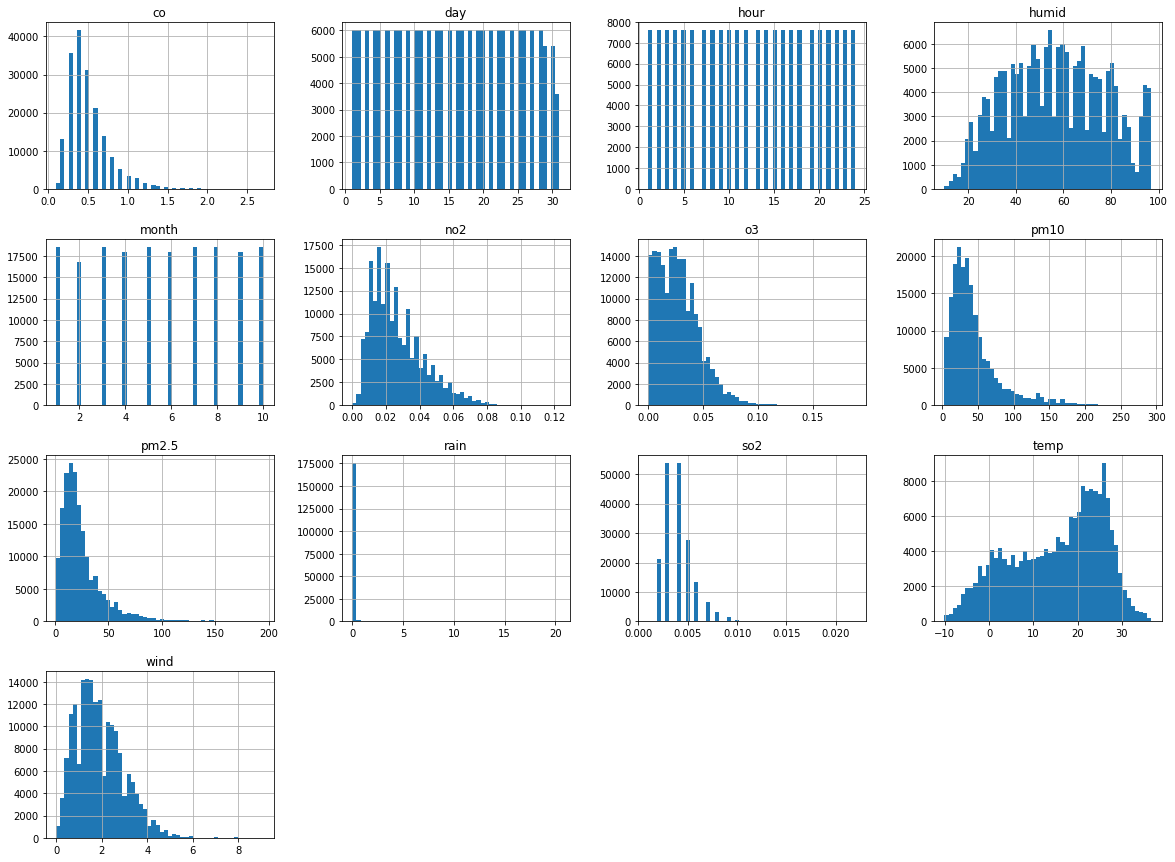

In [26]:
all_train.hist(bins=50, figsize=(20,15)) #bins : 구간 경곗값

In [27]:
all_train["county"].value_counts()

강남구     7296
금천구     7296
은평구     7296
광진구     7296
노원구     7296
용산구     7296
마포구     7296
양천구     7296
동대문구    7296
구로구     7296
송파구     7296
중랑구     7296
서대문구    7296
성북구     7296
종로구     7296
동작구     7296
서초구     7296
관악구     7296
성동구     7296
강서로     7296
중구      7296
강북구     7296
영등포구    7296
강동구     7296
도봉구     7296
Name: county, dtype: int64

In [28]:
all_train["county"].replace(['강북구', '송파구', '성북구', '도봉구', '양천구',
'강서로', '관악구', '동대문구','서대문구', '노원구', 
'마포구', '용산구','중구' ,'성동구' ,'서초구' ,'영등포구',
'강남구', '동작구', '중랑구' ,'종로구', '구로구', '광진구',
'은평구', '금천구', '강동구'],
['Gangbuk','Songpa','Seongbuk','Dobong','Yangcheon', 'Gangseo','Gwanak',
 'Dongdaemun','Seodaemun', 'Nowon', 'Mapo', 'Yongsan', 'Jung', 'Sungdong',
 'Seocho', 'Yeongdeungpo', 'Gangnam','Dongjak','Jungnang', 'Jongro',
'Guro', 'Gwangjin', 'Eunpeung', 'Geumcheon','Gangdong'],inplace=True)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text xticklabel objects>)

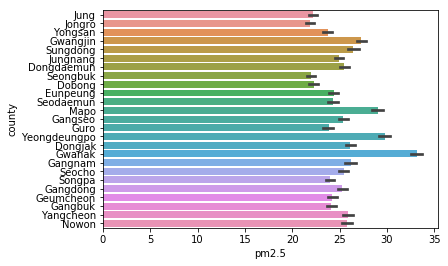

In [29]:
##county 별 미세먼지 평균 현황
graph1 = sns.barplot(x="pm2.5", y="county", data=all_train)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

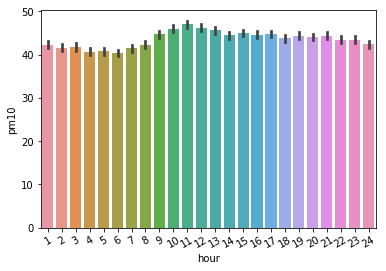

In [30]:
# 시간별 미세먼지 평균
graph2 = sns.barplot(x="hour", y="pm10", data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcAAAAEKCAYAAACFVoWhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsnXmc3dP5x98fCZFkIouJfRkhqCopoVRo1PJDFamtSoklaquqaumijVqritYSS0sSJUUIQcWeRGyRRAiaiEqUWJIhksku8vz+OOdm7sxd5s5k7tzteb9e85rvPd/vOee5X5In55zn8zwyMxzHcRyn0lir0AY4juM4TiFwB+g4juNUJO4AHcdxnIrEHaDjOI5TkbgDdBzHcSoSd4CO4zhOReIO0HEcx6lI3AE6juM4FYk7QMdxHKciaV9oA5zMVFdXW01NTaHNcBzHKSkmT55ca2Y9m3rOHWAzkLTIzKraar7NOq/H46ee11bTOU5Z0vPMEwptgtPGSHo/l+d8C9RxHMepSNwBNhNJ/SU9mvT5RkkD4/VsSZdImiJpmqTtY3tPSU/F9lslvS+pukBfwXEcx8G3QPNBrZntIuks4ALgNOAPwLNmdqWkg4DTC2qh45Qpl49/gnlLFjVoa/fSkynPbbTRRlx99dVtZZZTpLgDbH0ejL8nAz+I1/2AAQBmNkbS/EydJZ1OdJCb9Vg/j2Y6Tvkxb8kiPlm0sGFj48+OE3EH2HxW0nDreN1G95fH319R/36V6+BmdhtwG0CfLXt5sUbHaQY9O6XGqLXr2iWlbaONNmoLc5wixx1g83kf2EFSB4Lz2w+Y0ESfCcAxwJ8kHQh0z6+JjlOZ/Haf/0tp8yhQJxPuAHNEUntguZl9IOk+4A1gJvBaDt0vAUZIOhYYB3wM1DXVqX3PHv6H13EcJ0+4A8ydrwP/BTCzXwG/avyAmdUkXU8C+sePC4D/M7OVkvYE9jWz5Y37O47jOG2HO8BINpG7pDOAc4GWqtK3AO6TtBawAhiUS6cv533Kp0P+0sIpHady2fDMXxTaBKcEcAeYA2Z2C3DLGgwxy8y+2Vr2OI7jOGuOO8AkJAm4GjgYMOAyM7tXUn9gMFAL7EiQOJxgZibpEODaeG8K0MvMDpU0GNgEqAFqJZ0CDAH6EiJJzzez59ru2zlOeXLl+InMW7KkQVu7l15Pec61f05j3AE25AdAH2BnoBp4VdL4eO+bhHPAj4AXgL0kTQJuBfYxs1mSRjQab1egn5ktlfQLADP7RswQ86Skbc1sWXKHhjpADxZ1nKaYt2QJnyxq6ABp/Nlx0uAOsCH9gBFm9hXwqaRxwG7AQmCimX0IIGkqYWW3CHjPzGbF/iNomOVltJktTRr7BgAzmx6TtW5LiCZdTbIOcOctN3cdoOM0Qc9OnVLa2nVN/ceja/+cxrgDbEg2wXpy1GZC5N6UwH1xjmM7jtNCfr3P7iltHgTj5IInw27IeOBYSe0k9QT2ASZmeX460EtSTfx8bBNjHw8gaVtCZOiMNTXYcRzHaRm+AqRe5A6MAvYEXicEwfzKzD5JVHVoTDzbOwsYI6mW7M7yZuAWSdMIQTADm9ICrt1zQ/+XrOM4Tp6QWfkdM8VozueBy83s8dh2DHCKmR2U5vmdgdvNLHUvpem5qsxsUZzzJmCmmV23Zt8g0LdvX5s0aVJrDOU4jlMxSJpsZn2beq4sV4BRnnAGcL+k54B2wOVAOue3piL3QZJOAtYhpEW7tYXjpLBi7iw+uOH41hrOcZxmsvlP7y60CU4eKUsHCGBmb0p6BLgQ6AwMN7P/SvoVcGJ87FYzu0HS08BDkl4B9gD+Bwwws2WS9iBEZS4iyB8OMLM+kr4B3AGsTThLPdTM3pP0iKRNCImyrzOzv8ct1lqCmP5gYAlwuJnNbZu34TiO4zSmbB1g5BKCOH0F0FfS7oRAlN0Jq8KJUeqwBNgOOM7Mpkl6EDgC+BdwJ3CSmU2UdE3S2GcB10ShfAfqozxPMrPPJXUCJkl6gJD4uiswzswuknQtcApwVX6/vuM4ufDnFz6ndslXKe3tXz0xpc0F9eVDWTtAM1ss6V5gkZktl7Q38ICZLQGQ9BBBn/ck8K6ZTYtdJwM1kqqBdcwsEdxyD7B/vH4R+J2kLYEHzezd2P5zSYfF682ArYGpwNLEeWQcf+90NicL4Tftnqpvchyn9ald8hWfLk51gCye0/bGOG1GWTvAyKr4A62o8zOzuyS9BHwPeCrpHHAfYI8YITqB+oK5K9KMn27c1UL4nbZYv/wilBynCKnu1C5te/tuqeJ5F9SXD5XgAJMZD9wq6c+ELdDDyaLdM7N5kr6U1DeWN/ph4p6kXnHV91dJvYGdCHX+Po/O7+uELDKO4xQ5v9yrR9r2zX86vI0tcdqSinKA8RxvBPBqbBoSz/y2ydLtFOBOSXUEB7ogtv9I0nHAl4T8oL8DlgGnS3qdIJJ/JR/fw3Ecx1lzylIH2JokdH7x+rdADzNrE3W66wAdx3GaT0XqACVtCFxHkDLMJ5y7XW1mo9Zg2MOidKI9MBsY2IQNfYETzezcGAyzg5m1KNpzybx3mXLL91vS1XGcMmGXMx4ptAllS9k4wJiJ5SFgmJn9KLZtCRyWtWMTmNk9hOjPXJ+fBEyK16OB0Wsyv+M4jpMfyikZ9neBFbF6OwBm9n4Uuv9b0k4Akl6T9Pt4famk0yRVSXpG0hRJ0yQdHu/XSPqPpNslvSXpSUkd473dJL0h6SVJf5b0ZmzvL+nReD1Q0o3xeqikv0l6UdJ7ko5q07fjOI7jNKBsVoCEYrVTMtwbD+wtaTYhEfVesb0f8E9C8MoAM1sYtX8vS0qs3HoTBPKDJN0HHBn73AmcbmYvSsp1i3PjOOf2hJXhyOZ8Qcdxypvbxi9j/uKGcRkdXkwV44ML8luDcnKADZB0E8HZrCDk+TwXmAU8BhwQM7XUmNkMSWsDV0jah6AZ3BTYMA41y8ymxuuEQL4b0MXMXozt9wCH5mDWQ2a2Cng7nlems3u1EH6jHh2b9Z0dxylt5i82ahc1Ckxc5GL8fFFODvAtwuoMADM7O67mJhFkD32B94CngGpgEMGhQUiP1hPY1cy+jCvFhIC9sUC+Iy0vbps8VtoxkoXwO2zZzUN0HaeC6N459a+FDl03SfusC/LXnHJygM8SVnFnmtmQ2NYJwMxWSPoAOAa4lODsrok/EPJ0zo3Ob19gy2wTmdl8SXWS9jCzl0kSyDuO47SU0/dZN6VtlzNcjJ8vysYBxhJIRwDXRdnCPGAxoRoEhPqA+5nZEknPE/J0Ph/v3Q08ImkSIW/n9BymPBW4XdJiYCz1AnkIxXTXmE49t/EQaMdxnDzhQvgW0kggfxGwsZn9TNKRwGFmdtKazuFCeMdxnOZTEUL4mJnlR4SzuVXAT8wsL+nHJNUAj5rZjrHpe5J+TXiH7wMDo/D9ckL6tDVmYe1Mnv77Ia0xlOM4Rcr+p/270CZULCXrACXtSYi83CWWOqomVGNoE8zsXuDeRs0ufHccxykRStYBEjR1tWa2HMDMagFiBGdfM6uNacmuMbP+kgYDWwC94u/rzexvsc/FhEjQDwiV2yeb2TWSdiVUfV8CTEhMLGldYAghsnQlcL6ZPSdpICHzTCdCHcBRZvar2OdUwnnkR8BMYLmZnZOnd+M4TpEx4rkVLFic2j58fHqdH7jWL9+UsgN8Evi9pHeAp4F7zWxcE322B/YFugAzJA0BdibIJ75JeB9TqJdH3An81MzGxRJKCc4GMLNvSNoeeFLStvFenzjW8jjHDYQt2ouBXQjV4Z8FXk9nYLIOcIMeqRFhjuOUJgsWw/y61JiL+XWu8ysUJesAzWxRXKHtTXBq98ZglGw8FleMyyXNJYjd+wEPm9lSAEmPxN9dgW5JTvUu4OB43Q+4IdoxXdL7QMIBPmNmC+IYbxMkFdXAODP7PLbfn/R84++1Wge4bU1Xj1BynDKha2dIJ//ttF56nR+41i/flKwDBDCzrwgShLGSpgEnEbYkEzlOGy+hmlP1XWSWM7RaZXnHcSqD4/ZNH6Kw/2mu8ysUJZsMW9J2sRJ7gj6EaMzZwK6x7cjG/dIwAfi+pHUlVQHfAzCzL4AFkvrF545P6jM+8TlufW4BzMgyx0TgO5K6S2qfo12O4zhOHinlFWAVcEPMy7kSeJdwdvY14B+SfkMOFdnN7NWY+Pp1ggOdRL2o/WTgDklLgCeSut0M3BJXnSuBgTESNdMccyRdEe35CHibhsL5tKxX3dtDpB3HcfKEC+GpF7XHBNnjCVUeMlWWWNM52gOjgDuaKtTrQnjHcZzmUxFC+GQkLTKzqhZ2v03SDoQzw2Gt7fwigyXtH+d4klC8Nyvza2cy8s6D8mCK4zitzVEnjym0CU4zKRsHuCYkKsjneY4L8j2H4ziOkztl5QAl9QcuMLND4+cbgUlmNjQK5IcB3wfWBo6OEoaehHp+6xPKJh1ECKKpAh4nBMl8G5gDHG5mSyUNIpw3rkM4e/xxTLI9FFhIEMhvBPzKzEZKWgu4EfgOoSbhWoQtUC+I6zglyCPPrKSuUd2+0c+lCtpdyF7clGwUaAupNbNdCFlcEiuyPwDPxvZRhIjOBL2Bm8zs68AX1EdvPmhmu5nZzsB/CJUhEiSqvh8KJCrF/wCoAb4BnAbsmclASadLmiRp0sJFK1r8RR3HyR91i4wFdTT4mTNnTsrPJ598UmhTnSyU1QowBx6MvycTnBIEZzUAwMzGSJqf9HxKNfh4vaOky4BuhJVicoRouqrv/YD7Y/snkp7LZGCyEH5rF8I7TlHSpSpVJly13qYpz7mQvbgpNweYLIKHzEL4hEAdmidq7xivhwJHmNnrMf9n/wx91Oi34zhlwPf3S/2r86iTXdBeapTbFuj7wA6SOsRUZvvl0GcCoVI8kg4EuufQpwvwsaS1aSiQzzbHkZLWiqvC/jn0cRzHcfJIWawAo7ZuuZl9IOk+4A1CxYXXcuh+CTBC0rHAOOBjQsLqbJKKiwmi9veBaQSHmI0HCM74TeCd2LdJIXz36t4eWu04jpMnCiKEl/QVwXGsTdi2HEYoT7SqhePtDNxuZrs38VyKVlBSB+ArM1sZawwOMbM+LbGjibkTQvj1CanR9jKzrCfkNVt1tYsv2aO1TXEcp4049cQnmn7IaXWKXQi/NOFkJG1AkCF0JURkNgtJZwDnAue10JYtgPuiVGEFMKiF4zTFozFt2zrApU05P8dxHCe/FPwM0MzmEjR15yiwrqQ7JU2T9JqkfQEkDZT0oKQxkmZKujr2vwX4C3CjpLGSbo/6PyRtJeklSa9KujQxp6QqSc9ImkKIDB1sZjub2W7AdpImSpoq6VZJ7WKfRZL+JGmypKcl7R7ne0/SYUk23pg0z6NRmwhBG/gY8CVwRlKEqOM4jlMAiuIM0MzeiyuwDYATYltrFJv9K2FLc7iks5OmXAYMMLOFkqqBl2NC7O2BYwnbk19KupkQ5DIc6AyMNbMLJY0CLgMOAHYgbOGObuJrdgZeNrPfRuc9KI7hOE4Z8OyTX7F4ccMjpXFPp6/27gL54qAoHGAkIRVozWKze1EvXr8L+FPSXFdI2gdYBWxKKI67HyELzKuxskNHYG7sswJIRKRMIwTdfBkrQtTk8P1WAI/G68kE55n6EpIqwvdY3yvCO06psHixUbewYVvdQq/2XswUhQOU1IuwkptL6xebTRflczzQE9g1OrHZBM2gCMmwf52mz5dWHzG0KmGLma2KUaiQXYeY3D9Zh9jQ2CQhfM1WLoR3nFKhc+dUcfx6XVLF8eAC+WKh4A4w5uK8BbjRzExSotjss42Kze6SYYiJwHWSuhO2QI8krNAAXgB+CPyThnq9rsDc6Pz2JawkAZ4BHpZ0nZnNldQD6GJm7+f4dWYDZ8Xt3E2BrFGpjuOUD989sF1K26knuji+mCmUA+woaSr1Moi7gGvjvdYsNvsz4B5JPyNo8RLcDTwiaRIwFZgex3pb0u8I545rEQJWzibo/XLhBUKy62kEzd8alVWqXr+3h1E7juPkibIoiNuSYrOlgBfEdRzHaT7FrgNsNST9Fvi5pM6EM7yHyaHYbCvM26wCvDFnaF8zOyfXPp9+PpNrRvxfS8xznIrnguN898TJTkk7wJi55VBg07hNWg2sY+WwrHUcx3HySsGF8GvIxoQaf4mIzFoz+0jSrpLGRdH6E5I2BpDUR9LLkt6QNCoGzhAF7X+KAvh3JO0d2ztJui8+f6+kVyStXlZL+oukKVFU3zNprL7xujpGmDZA0veiQL863y/IcRzHSU9JrwCBJ4HfS3oHeBq4F3iRoCM83MzmKSS5vhw4hSBo/6mZjZP0R0LqtUQKtfZmtrukQ2L7/sBZwHwz20nSjoSAmQSdgSlm9gtJv499mtzelDQAOB84xMzmN/W84zhNM/Hxr1ha13Dj543HvUK7k52SdoAx8GVXYG9gX4IDvAzYEXgqRo62I5Qu6gp0M7Nxsfsw4P6k4ZKL5dbE636EbDKY2ZuS3kh6flWcD4LM4kGaZl9CSrQDzWxhugeShfDdql0I7zi5sLTOWNLoT9QSF6E7TVDSDhDAzL4CxgJjo3TibOAtM9sz+bnoALPR3GK5KabE38li+MYe7D2gFyFTTdrwzmQh/Oa9XAjvOLnQsUuqCL17GhG6C9CdZEraAUraDlhlZjNjUx/gP8CBkvY0s5cUitZua2ZvSZovaW8zex74MaH+XzYSxXKfk7QD8I2ke2sBRwH/An4Un4Ught+VINA/qtF47wMXAKMkHW1mbzX/WzuO05jdD04VoV9wnIvQneyUtAMkFK29QaHM0ErgXcL24W3A3+Kqrz1wPfAWcBJBZN+JsBo7uYnxbwaGxa3P1wiFdhMi+8XA1yVNjm3HxvZrCOWVfkxIzN0AM5sh6XjgfknfN7P/Zpp8wx69PZTbcRwnT5SFED5fxFJIa5vZMklbE1KlbWtmK9pifhfCO47jNJ+KEcLnilpWhX4Q8EdJHxPOA89sK+cH8MH8mZz3wEFtNZ3jlC3XHzmm6YeciqNiHCAtq0K/DLivOdlbHMdxnNKgkhzgamKlh9MJdf8GAx2AIQSJwkrgfDN7Lj6+uaQxwFbAPWZ2CYCk8wnaQoC/m9n1kmqAxwkBMd8G5hD0iEsl7Qb8g3B2OAE42Mx2zPuXdZwKYtbolayoSz3WOfFh1wQ6qVSkA4RmVaHfnaArXEJwmI8R4q1PBr5F2Bp9RdI4YD7QGzjOzAZJuo9QnumfwJ3A6Wb2oqSrMtmVrAPs4jpAx2kWK+qMFQtS2+cscE2gk0rFOsBILlXonzKzzwAkPRifNWCUmS1Oat8bGA3MMrNExpjJQE2MUu1iZi/G9nsIOUxTSNYBbri16wAdpzmsk0YPCNCzyjWBTioV6wCbUYW+8Z8ma+L5xlXrOzbxvOM4rcRWh6X/K+36I10T6KRS6smwW0TjKvRAogo9jarQAxwgqYekjsARhKK344EjYrLszsAA4PlM88Wcn3WS9ohNP8zD13Icx3GaQSWtAFtahX5CfHYbQhDMJABJQwnZXiAEwbwWg2AycSpwu6TFhNRtaU4qGrJ5994evu04jpMnSlYIn6TrS/AvM8sYXFJoElXr4/VFwMZm9rNsfVwI7ziO03wqQQi/WtdXInxP0q8J7/x9YGBTHWZ+MZuDHz4133Y5jtNMHj/8H4U2wWkFyu4MUNLsRKFZSX0ljY3XgyXdEQvWvifp3NheI2m6pGGx8O3ImCuULIV10xa9lTRQ0oOSxkiaKSlZZFQFdAJqgY/ILsB3HMdx8kwprwATZ3oJrjSzezM+HdieUJOvCzBD0pDYvh1wqpm9IOkO4CxJfyVzYd1s9AG+SYgGnSHpBkI06MXALkAdIUn267l+UcdxCsOXoz7B6lamtJ/4gAvry4FSdoAt2QJ9zMyWA8slzQU2jO0fmNkL8fqfwLnAGNIU1s1hjmfMbAGApLeBLYFqYJyZfR7b76deZ9iAZCH8uj07N/PrOY7TmljdSvgi1QHO+cKF9eVAKTvATGQrSNtYo5f4/pm0fimFdVs4R846wGQhfNdtqkszQslxygR1aZ9GVg+bdt4wpc2F9aVHOTrA2YSCtI8T0pDlwhaJArrAcQTpwwygZ7rCumQvepuOicB1kroTtkCPpGEEq+M4RcjaA9I7teEeBFMWlLIDbHwGOMbMLgIuAf4h6TfAKzmO9R/gJEm3AjOBIWa2QtJRpC+sm7XobWPMbI6kK6I9HwFvk4MOsHe3Go82cxzHyRMlqwNsLaJ4/dF8V2ZI6AAltQdGAXeY2ahsfVwH6DiO03xKXgco6bfAjwjnaKuAn5hZriu6dOPV0AaOLguDJe1PODN8EnioqQ4zv/iYQ0ZdlnfDHMfJnX8P+F2hTXBaiaJ0gJL2JFRL2CWmJKsG1snHXGY2mxDtmVfM7IJ8z+E4juPkTrEK4TcGaqNkATOrNbOPsgjT+0h6OQrZR8Vgk4SQ/XVJLwFnJwaP4vfnJU2JP99OuvdLSa/GsS5Jen66pL9LelPS3ZL2l/RCFLzvHp8bLOmCpLHejH1rJP1H0u2S3pL0ZEyu7TiO4xSIolwBErYIfy/pHeBp4F7gRTIL04cDPzWzcZL+SMiych6hCG2i/c9J488FDjCzZZJ6AyOAvpIOJBS03Z0gXRgtaR/gf4Rk2EcTNHqvErZn+wGHAb8hVIrIRqZCuY7jFCErHp4KC5eltJ84KlUEDy6EL0WK0gHGYJFdCUVm9yU4wMtII0yPEZrdzGxc7D4MuD9N+13AwfF6beBGSX0IZ4wJUfqB8ee1+LmK4Lj+Ryh0Ow1A0lsEwbspVJCoyeFrpRTKTfdQQyF81xyGdRwnLyxchi1YmtLs1eXLh6J0gABm9hWhbNDY6GTOJo0wPTq6dKQvDR34OfApsDNhG3hZUp8rzezWRnPU0FDgvirp8yrq32OyQB4aiuTTFcpNoaEQftPKDtF1nEKy3rppM1hsUtUj7eMuhC89cnKAkq4B7owi8LwjaTtglZnNjE19CFq9A9MJ0yXNl7S3mT0P/JiQduwLSQsk9TOzCcSCt5GuwIdmtkrSSYTVJMATwKWS7o6r0E2BL5th+mxC8A6SdgG2atkbcByn0KxzePpMi8M9CrRsyHUFOB24LWrY7gRGJPJd5okq4AZJ3QirqncJ24K3kV6YfhKhoG0n4D3g5DjOycAdkpYQnFuCm4EHJB0NPAcsBjCzJyV9DXgpbrMuAk4grNhy4QHgxCjQfxV4pwXffTW9u23sIdeO4zh5ollC+LgyO5mQLuwF4HYzey5PtlU8LoR3HMdpPq0uhJfUjlBOaHtCTbvXgfMl/cTMfthiS4sUSQb808x+HD+3J1SDeMXMDm0LG2Z+MZfvPXhjW0zlOE4Z89gPzim0CUVJrmeA1wLfJ+S9vMLMJsZbf5I0I1/GFZjFwI6SOprZUuAAwMO/HMdxyoRcV4BvAr8zsyVp7u3eivYUG48D3wNGErZ9RxCkGUTx+/WEaM6lwMlmNkPSQGAA0IEQBHOPmSUE9edTX1D372Z2fdt9FcdxypkVo1/AFi5Oe+/Ehyamba907WKuDvB4M7sjuUHSM2a2X56DYQrNvwiC/EeBnYA7iA6QEBi0j5mtjDk+r6C+/NLuBM3iEuBVSY8RJBknA98iyC1ekTTOzF4jiQY6wOru+fxujuOUEbZwMbYgvQOck6G90snqACWtC3QCqmN6sYQsZj1gkzzbVnDM7I2oATwO+Hej212BYTGTjBHE9QmeMrPPACQ9SMgYY8AoM1uc1L439aL7xJxJOsAtXAfoOE5OaL3OGe9tUtUtbXulaxebWgH+hJBSbBNC9pKEA1wI3JRHu4qJ0YT6f/2B9ZPaLwWeM7MB0UmOTbqXqcK84zhOXljnsL0y3hvuQTBpyeoAzeyvwF8l/dTMbmgjm4qNO4AFZjZNUv+k9q7UB8UMbNTnAEk9CGeDRxDO/VYBQyVdRXCGAwiifcdxHKcA5HQGaGY3xIoJNcl9zGx4nuwqGszsQ+CvaW5dTdgCPZ/UqvATCLlHtyEEwUwCkDQUSJxG/73x+V9jenfbwMOXHcdx8kROQnhJdwFbA1Opz4piZnZuHm1rMZI2BK4D9gDmAyuAq5uqwN5Kcw8E+prZGnsuF8I7juM0n9YWwvcFdrDmpI0pEAo5zB4ChpnZj2LbloSyRSXFu/M/49AHhhbaDMdxWsCjRw4stAlOE+RaEPdNoFTChb4LrDCzWxINZvZ+3MZNWwhXUn9JYyWNjIVv746OFEmHxLYJkv4WJRFI+o6kqfHnNUld4nQ9gW8lF9SNz58fC+S+Kem8NnsbjuM4TlpyXQFWA29LmkhSWR8zK8ZV1deBKRnupS2EG+99M/b9iJDndC9Jk4BbCXq/WZJGJI11AXC2mb0gqQpYlqWg7mJy0AA6jlOaLB/9NFa3qEHbiQ83Dg0IVLr4vJjI1QEOzqcR+UTSTQQd3gpgf9IXwgWYGANeiNUcagjVIN4zs1nxmRFEkTrBSV4r6W7gQTP7MDrAdAV1q8hBAxjvrRbCd6xev/Ftx3GKEKtbhC2oa9A2p9Fnp/jINQp0XNNPFQ1vUZ+RBTM7W1I1MInMhXAhtWBte7Jo98zsqpjh5RDg5ZgNJlNB3Zy3PJOF8N223qroz1wdxwF1qUpp26RqvbTPVrr4vJjINRl2HfXi7nUIWU8Wm1n6/8KF5VngCklnmtmQ2NYp/s5UCDcT04FekmrMbDZwbOKGpK3NbBowTdKehCoZmQrqjsc1gI5TtnQ4bP+UtuEeBFP05LoC7JL8WdIRFGkSbDOzaN91kn4FzCOcwV1IOBtMKYSbZaylks4CxkiqpV7DB3CepH0Jq8W3gcfNbHm6grpmNqW5GkDHcRwnvzSrIG6DjtLLZrZHK9tTdEiqiqs5EdK/zTSz69pibtcBOo7jNJ9W1QFK+kHSx7UIkZOVcj41SNKpwOaE7z5T0jG0gbD+3fnzOXTkffmcwnGcJnj0qGMKbYKTJ3KNAv1+0vVKYDZweKtbU5xcDxwDXJjQFjZXWC+pnZl91fSTjuM4TluR6xngyfk2pIhJK6wHbmic9iyK5K8xs7ES5dl6AAAgAElEQVSSFgHXAv8H/EJSB0JVifbAq8CZZrYcx3EcpyDkugW6GXADsBdh63MC8LOEbq7MySasz0Zn4E0z+32sqzgT2M/M3pE0HDiTsLp0HKfALH/kMawuvW7vxNGPprS5mL08yHUL9E7gHuDo+PmE2HZAPowqZhoJ67PVRPwKeCBebwfMMrN34udhwNmkcYANhfDVrWS14zjZsLo6bMGCtPfmZGh3Sp9cHWBPM7sz6fPQCspnmU1Yv5KG+VTXTbpelnTul3Mx3IZC+K0rJdDIcQqKunTJeG+TqlSRu4vZy4NcHWCtpBMIqcAAjgM+y49JRUc2Yf1s4CxJawGbklkbOR2okbSNmb1LEMGXUnYdxylrOnz/exnvDfco0LIlVwd4CnAjocaeAS8SkjuXPU0I618AZgHTCBUz0p4VxuTbJwP3S0oEwdyS7tlktune3UOwHcdx8kSuDvBS4CQzmw8gqQchovGUfBlWTJjZx8APM9w+PkOfqkafnyFUnHAcx3GKgFwd4E4J5wdgZp9LyviXecya8jxwuZk9HtuOAU4xs4PWxODmIumfwEgze6gt520N3p2/gMNH/rvQZjiOU8Y8fNQhhTahYORaEHctSd0TH+IKMKPzjJXjzyCUC1pXUmfgckLko+M4juMUnFxXgH8BXpQ0knAGeAzBoWXEzN6U9AjhrKwzMNzM/hurMJxNqCrxInBOrM5wQnxWwGgz+008L6slnJcdDCwBDjezubGg7T/j808APzWzbjEg5UagP/BfQuUKACTtRti6rSIUxx1oZp9KmhDtmCppI2CCmW0j6TTgIKAL0Iuwkvx1HOsnwC8IBXTfBRaZ2XlxxVkH7AhsSNBLPi6pY/weuxAqRJxnZuNzfP+O4zgtZukjI1lVtzDtvRNH/ytteyVoHXPNBDM8Vkf/LsHh/MDM3s6h6yWEwJAVQF9JOxJKAX3bzFZKug34oaTxwGWEHKMLgKclHQqMIZQwGmdmF0m6lnDueBVBmH+Nmd0v6ZykOY8CtiI4oE0IlRpuiZlY/gocZma1ko4nnG2eTnZ2JjitlcA7km4glFG6KLYvBsbSsFLE5sB3CMVwn5a0DXAuIaPMNyR9Hfi3pN5mtiJ5soY6wJ5NmOY4jtM0q+oWYgvmp703J0N7JZDrCpDo8HJxesl9Fku6l7A6Wh6Lxu4GTIrlgjoCHxCK0T5rZrUAku4B9iE4wKWJc0RgMqGSOsC3CMVoIYj0L4vX+wAjzGwV8KGksbH9a4SsLk/HudsBuWSyedrM6qJd04EtgM2ivYmgoJGxPcF9cf4Zkj4gOMJ+wJ/je3lL0kfANjR6pw11gL1dB+g4zhqzVpf1WJXh3iZVndK2V4LWMWcHuAasij8QVo93mNnFyQ9IOipL/+QVUqJSe1OkcxwC3jCzvdPcSxa0r9voXrMqxWeY33Lo4ziOkxc6fj/zX7HDPQimzXgaOCZmUkHS+pK2AF4G9o2f2xMkB00JxScStlOhoURhPGFbda1Ykf07sf1tYFNJu8e514lbkRAE7bvG62zOOMEr0d5uktYGftDo/tEKbEvYDp0Z7To+zv01YGPC2aHjOI5TANpiBbgaM5sm6RLCNuRahGCQM8zsVUm/J5ylCXjEzB6LzjAT5wJ3SboQ+Dfh7BBgJLAvQZg+g+B4iFuwRwF/k9SF8N3/Qkh19mfg3ihWfy6H7/E/SX8mOOE5cYzkhIHvxnk3AE43sxXx7PBWSdPi9z6x8flfY7bp3rWiQ5Qdx3HySYsrwheaKK1YEjO1nAAMMLMjm+rXivMnKsWvDTwMDDGzR1pTd+gV4R3HcZpPq1aEL1J2A66PK8n5ZEjNJukrQqqytQlnfcOA62OQyppwqaT+hDPDMYTt1ROzdZA0FHjUzEbmMsF/5y9iwAMT1tBMx3GKjVFH9iu0CQ4l7ADNbCzQJ4dHl5pZHwBJGxAiRrsCf1jD+X+e4dbwNRnXcRzHaRtK1gG2hCigPx14VdJgoAMwhKA/XAmcb2bPxUrvhxGqPmwNjDKzXwFIOpUg2P+IENyy3MzOieMtMrNrJA0iaPnWIZwH/tjMliTbIulSQoDMKa2wGnUcp0hZPHo4VvdFg7YTH74t7bOVID4vJirKAQKY2Xtx23QDQmFfojh9e+DJGLkJYXX5TYIMYkYMYvkKuJgggK8jlEp6Pc00D5rZ7QCSLgNOJQj3iW1XE1ahJ1ujQ9iGQvgNW+U7O45TOKzuC1YtaFg9bo7X2C0KKs4BRhKavH5Ex2Rm0yW9DyQc4DNmtgBA0tvAlkA1ISvN57H9/qTnk9kxOr5uhLRrTyTduxh4xczSZqBJFsJ333r70oxQchxnNerSLUVvtnFVY7lxoBLE58VExTlASb0IK7m5ZBent0QAn2AocISZvR63U/sn3XsV2FVSj4QjdRynfOl8WGps3HAPgikK2loIX1Ak9SQkpL4xbj0mi9O3JaQzm5FliInAdyR1jxrFTLKLLsDHUSLRuF7gGEIu08eiHtFxHMcpAJWwAuwoaSr1Moi7gGvjvZsJibKnxXsDo2A+7UBmNkfSFYRMMB8Rsssk7+Yntiwvjs+8T5BgdGk0zv3R+Y2WdIiZLU0339bdqzxc2nEcJ0+UrBC+OUjaELgO2IOgGVwBXG1mo1owVkIA3x4YRchtOioGyUwxszsz9BtKMzSAAD223tH2v/q+5proOI5TMtx35A6tPmauQviy3wJVWM49BIw3s15mtishd+hmLRxycFxRvgnMAh6KkoZvAaNbw2bHcRwn/5S9AyTUMFxhZrckGszsfTO7QdK/Je0EIOm1mI8USZdKOk1SlaRnJE2RNE3S4WZ2AXAEYbuzI8ERfgv4jpl9JmmQpFclvS7pAUkptUbi+EOjHMNxHMcpAJVwBvh1QlHedIwH9pY0m3AGuFds70eoNr+MkGN0Yaxg8bKkxCqvN3CcmQ2SdB8hIOafrIEG0HEcpxxZOPomvqr7LO29Ex9eJ217WyQFqAQH2ABJNxEc3ArgPEJViVnAY8ABccVWY2YzYhTnFZL2IdQ03BRIqNNnmdnUeD0ZqInXLdYARvtWC+E7VW+8ht/WcRyn8HxV9xmrFsxLe6+QSQEqwQG+RZJcwczOjqu5SQRNXl/gPeApgtB9EMGhQZAw9AR2NbMv40oxoWBtrBPsGK+HsgYawGQhfI+td/QVouM4JU+7LutnvLdxVeYVYL6pBAf4LGEVd6aZDYltnQBinb4PgGOASwnO7pr4A2Grcm50fvsSssE0RWMN4Jyke2MIK8LHJB1oZnVr+N0cx3GKnvUOOzvjveF5iALNlbJ3gLFe4BHAdZJ+BcwDFhMSWgM8D+xnZkskPU+IDn0+3rsbeETSJGAqMD2HKVtFAwjQq/u6eQkRdhzHcSpEB1iqeEFcx3Gc5lMJBXFX05pC92Lioy++ZPCojwpthuM4eWDwgE0KbULFU/I6tDwI3R3HcZwKoOQdINmF7jWSno9C9imSvg0gqb+ksZJGSpou6e7oSJF0SGybIOlvkh6N7YMl3RH7vSfp3MR8kh6SNFnSW1HGkGhfJOlP8d7TknZP6n9Ym70hx3EcJ4Vy2ALNJnSfCxxgZssk9QZGEGQPEIrdfp2Q1PoFYK8Y7HIrsI+ZzZI0otF42wP7EgJbZkgaYmZfEqq6fy6pI6Ha/ANm9hnQGRhrZhdKGgVcBhwA7AAMw1OnOU5ZM+3hP7F8YW3aeyeOape23avCtx3l4AAb0Ejovj9wo6Q+BK1ecvHaiWb2YewzlSBkXwS8Z2az4jMjiKL0yGNmthxYLmkuQRT/IXCupAHxmc0JWWI+izaMie3TgOVRUjGNeuF8Y/tXC+G79ty0Ja/AcZwiYfnCWpYu+CTtPa8KX3jKwQFmE7r/HPgU2Jmw3bssqV9LCt6m9JHUn+Bo94xSirHUi+W/TEp3tirR38xWxWoSKSQL4TfZZmcP0XWcEqbDetUZ7/WoyrwCdNqGcnCAGYXuBCH7h9HhnASk/z+unulAL0k1ZjYbODaH+bsC86Pz254Qieo4jsM3Dr8w4z2PAi08Je8AmxC6TwEekHQ08FxszzbWUklnAWMk1RIqwDfFGOAMSW8Qqsm/3PJv05BNuq3tf0gcx3HyhAvhG5FU8FbATcBMM7uuELa4EN5xHKf5VJQQvrlI+i3wI8I53irgJ2b2Srw9KG6XrgO8RogKzXXc/sAFZnZoa9j5+fyV3P1A+gzqjuMUP8cf2bPQJjhZqDgHKGlP4FBgFzNbHgNmVqcjj6u9gqz4HMdxnLaj4hwgsDFQG+UMmFktgKRdgWsJNfxqgYFm9nGUUNxCCKz5L0HzN1/SNrG9J2EleXQcv0rSSGBHQlmlE+I55X6EKhPtCWWRzkzY4DhOaTNm9OUsqkvdrXni4dS4O9f5FQ+V6ACfBH4v6R3gaeBe4EVC1fbDzWyepGOBy4FTgOHAT81snKQ/An8gFNK9G7jKzEZJWpcgs9iczAL7oYSqE+9IGg6cCVzf2LhkHeD61Z7NzXFKgUV181iYRu+30LV+RU3FOcAY4LIrsDchq8u9hAwtOwJPxYxo7Qg1/boC3cxsXOw+DEiUM9o0kWzbzJYBxL7pBPZ1hAry7ySNczZpHGCyDrDX1n08QslxSoCqLunP+rqk0fq5zq94qDgHCGBmXwFjgbExK8vZwFtmtmfyc9EBpiObYL4lAnvHcUqYgw77bdp2D4IpbsohGXazkLRdzAuaoA/wH6BnDJBB0tqSvm5mC4D5kvaOz/4YGGdmC4EPo/4QSR0kdSIz04GaeG64epxW/FqO4zhOM6nEFWAVcIOkbsBK4F3CmdttwN/iqq89YXvyLeAk4Jbo4N4DTo7j/Bi4NZ4Lfkl9EEwKMRn3yYTt00QQzC2Znk/Qo3t7/xek4zhOnqg4IXwTGsCiYttefezmy54qtBmOU/Hs/yP/h2gp4UL4NDSlAXQcx3Eqh0o7A0zRAJrZR5L2k/SapGmx6G0HAEmzJV0Si+lOi8mukdRT0lOx/VZJ70uqVijAO13SMElvxIK7nWKf30t6VdKbkm6LqdYcx3GcAlFRW6CSqoAJBFF7QgP4CjCThhq9KWZ2vaTZwF9idfmzCCvH0yTdCMwxsyslHQQ8ThDEVwGzgH5m9oKkO4C3zewaST3M7PNox13AfWb2SDZ7fQvUcdqeEY9fzoJFDUXtnbq4oL2U8C3QNGTQAF5Jdo3eg/H3ZOAH8bofMCCOOUbS/KRpPjCzF+L1P4FzCRlg9o3VKjoBPQgBNikOMFkIv4EL4R2nzVmwaB7zFzYUtc9fWCBjnLxSUQ4Q0moAT2qiS0LXl9D0QXZdX+MltcVMMTcDfc3sA0mDqS+a29i+1UL4bXu5EN5x2pquVakBL5lWgE5pU1EOUNJ2wCozmxmb+hArxkvaxszeJTeN3gTgGOBPkg4Euifd20LSnmb2EnBcfDbh7GrjNuxRwMhW+VKO47Qqxx2cKmr3KNDypKIcIJk1gCNonkbvEmBEzBk6DviYkO6siiCqP0nSrYSzxSGxWvztwDRgdpyjSdbr0d7/4DmO4+SJigqCaS1ilOhXZrYySiuGmFkfSTXAo2a2Y2vM4wVxHcdxmk/ZB8FI2pBQt28PYD6wArg6kaA6T3POBvoStjzvk7RWnHdQPuZbUruS1/4+Nx9DO46TR7552gaFNsHJgZJ0gFFD9xAwzMx+FNu2BA5ri/njGeI307TPJlSVcBzHcYqcUhXCfxdYYWarz+rM7P2o16uR9HwUqU+R9G0ASf0ljY3i9OmS7k6I0SUdEtsmSPqbpEdj+/qSnowi+VtJiv6UdH4Utb8p6bzYViPpP5Jul/RW7Nsx3tstiuNfkvRnSW+23etyHMdxGlOSK0BCwdkpGe7NBQ6ICah7EwJcEnvBmYrV3grsY2azJI1IGusPwAQz+6Ok7xH1eVFLeDLwLYJTfEXSOMJWbG/gODMbJOk+4EiCHvBO4HQze1HSVa3zGhzHKTS3PXcFny9uKJzvMD5VNgEuni82StUBNkDSTQRx+gpgf+BGSX0I2r1tkx5NV6x2EfCemc2Kz4wgOjpgH6L43cweSxK89wNGmdniONaDBHH9aIKofmp8bjKhDFI3oIuZvRjb7yHkJE33XVYL4Tfq4UJ4xyl2Pl88j9q6RtXg6wpji9M8StUBvkVYWQFgZmfHxNaTgJ8TtX2ELd5lSf1aUqw2XZhscwridsxhjvrJkoTwO9S4EN5xip0enVOlSh3Wy7wCdIqHUnWAzwJXSDrTzIbEtkRB2q7Ah2a2StJJQPr/E+uZDvSSVBODWI5NujceOB64TNLB1AvexwND41amCGnRfpxpAjObL6lO0h5m9jLww5y/qeM4Rc3p+/4mpc2jQEuDknSAZmYK1divi/k15wGLgQsJZ4MPSDoaeC62ZxtraUx0PUZSLTAx6XZC8D6FIHj/X+wzRdLQpGf/bmavRR1gJk4Fbpe0mJCKbUFT37NTdXv/g+Q4jpMnXAhPqBIRE2ULuAmYaWbX5WOOeH0RsLGZ/SxbHxfCO47jNJ+SFsIXQOQ+KG6XrgO8RogKRdJY4AIzaw0v9D1Jvya88/eBgU11WPHpl3zwl0+aesxxnDZi81/4GV45UXQOsBAi97jaa9UVX5o57iWUX3Icx3GKgKJzgGQQuROSWLcDrgL6Ax2Am8zsVkn9CSu1QwFiwdpJZjY0pi+7h1D/b22CxOBKYBvgz4l54lnij4FVwONmdlGc/mhJNwPdgFPN7Pksdgi4GjiYED16mZndG+0bDNQSMsVMBk4w3392nKLlzxOvpHZJbYO29q+7vq+cKEYHmE3kfiqwwMx2iwmpX5D0ZA5jfmBme0q6DhgK7EUoUfQWcEuM8DwC+Fas3NAjqW97M9td0iEEYfz+WezYhVBiaWegGnhV0vg4TooIn1AqqQHJOsBNu2+aw1dzHCcf1C6p5dMljY4glhTGFic/FKMDbEAjkfv7wE6Sjoq3uxIyr6xoYpjR8fc0oMrM6oA6ScuiSH1/4E4zWwJgZp8n9U2uCF8Trw/MYEc/YEQsuvtpzA6zG7CQ9CL8FAeYrAPcafOdfYXoOAWiulN1Slv77q7vKyeK0QFmE7n/D/ipmT2R3EFSPxrmNW1cbT0hTl9FQ6H6KurF8JmcTaaK8OnsOCTz10orwnccp0j55e6/TmnzIJjyohiTYT8LrCvpzKS2hMj9CeBMSWsDSNpWUmfCynAHSR0kdQX2a+acTwKnSOoUx+3RxPOZ7BgPHCupnaSehFRqE7OM4ziO4xSIoluFNCFyv5+wdTglBpzMA44wsw9i4uk3CFXYX2vmnGNi7tBJklYA/wZS0zvU8/d0dgCjgD2B1wkryl+Z2SeStm+OPQnW2XBt/xen4zhOnig7IXxbaAglDQYWmdk1zegzG+hrZrVNPZvAhfCO4zjNp6SF8C2lEBrCfPLlp8v45Nq3C22G4zjARufvUGgTnFamGM8A14Q2KZQb2VnSs5JmShqUNNbqZyTdKGlgsoGSOkoak+jjOI7jFIayWgHSdoVyAXYibLN2Bl6T9FgO9lUB/wKGm9nwZnwvx3HakCtfuYnapZ81aGs3dZ20z7oIvnQpNwfYgDwWygV42MyWAkslPQfsDnzRhEkPE84j785ic5IQfuNcvqbjOK1M7dLP+KRRlffsdWWcUqTcHGAhC+UasJLsesQXgIMl3ZMpDVqyEH7nzXcsrwglxykRqjuun9LWrlvmFaBTmpSbA2yrQrkAh0u6krAF2h+4KI65Q0yPti5Bj5ic7eX3wMXAzcCZOI5TlPz6W2entHkQTPlRVkEwcVV1BPAdSbMkTQSGETSENwMnSXqZsP3ZZKFcIFEodwJh9ZhcxHYi8BjwMnCpmX1kZh8ACT3i3aTXI55HEPr7oYHjOE4BKTsdYGvSFoVys+E6QMdxnOZTVjrA6ICeBy43s8dj2zHAKWZ2UB6nHiTpUsLq72Viody24su5i/j0ry+05ZSO4+SRDX+2V6FNcJIoCQcY06OdAdwfIy7bAZcD+XR+mNl1ko4EzjGzqfmcy3Ecx2lbSuYM0MzeBB4hnOf9gaCl+6+kRyRNlvSWpNMAJLWX9IWkqyS9LuklSRvEe70lvSJpoqRLJa2WLkj6jaRpsc/lSdP/MD4/I0lA317StbH9jaS514rtb8axjort+0t6RtKDcRzXATqO4xSQklgBJnEJQei+gnoR+0lm9nms5DBJ0gNAHSHqc5yZXSTpWuAUQhX3G4BrzOx+SeckBpb0fUIl993NbGmjihCKRXEPI0RyHkTQ6s2N7R2AlxWK4u4J7ECQW/SkYVHcXeK9ufH5Pczs5VZ+R47jFJgrXxrGvCWpsuB2k9OforiYvjCUlAM0s8WS7iUkok5o934eHRPAZsDWwFRgaeK8kFDMdu94/S0gUbfvHuCyeL0/cEeM/sy1KO7XJP0wfk4uintPLIr7SYwg7Utw2i+b2cfQQHDfwAEmC+E3675hbi/GcZyiYt6SL/hk8WepN1xMX1SUlAOMrIo/SNqfUHNvj7hqm0C9+Dy5SnwuBWhbUhT3LDN7psEg0oAsczRZFLeBEH6L7T1E13FKkJ6duqVtb9etcW6MgIvpC0MpOsBkugKfR+f3dWC3HPpMBAYADwA/TGp/ErhQ0r2JLdBGq8DGPAGcJWmcma2UtB2hYv14YKCku4FqYC/gZ4TcoY7jVAC/3vOktO0eBVpclLoDfAw4XdLrhMwtr+TQ51zgLkkXEgrfLgAws0cl7Uw4R/ySEHBzcZZxbgW2AKbG4hFzgcOBkYQk2YmiuOeb2dz4TLNYe4Mq/wPjOI6TJypOCC+pM7AkSitOAAaY2ZFN9SsELoR3HMdpPmUlhG9ldgOul7QW8A3gH4kbki4AqsxscIFsa8DKuQuYe+O/C22G4zitwAbnHNL0Q06bUnEO0MzGAn0AJC0D9pNUbWa1BTXMcRzHaVMqzgE2YiUh4vLnwG+Tb0jaEriDoOWbB5wMzAFmEqQWXYHPgf5mNl7S8/GZz2O/XsAS4HQze0PSYMKZYa/4+3oz+1u+v6DjOG3LFS+MZN7ihSnt7Sb+K+3zrgEsHJXuACEkuX4jTXWGGwnZZoZJOgX4m5kdIekdgph9K6K+UNIrwGZm9q6kG4DX4rPfBYYTV5zA9sC+QBdghqQhZvZl8qQNdYA98/KFHcfJH/MWL+STxfNTb6RrcwpKxTtAM1sY05KdCyxNurUn8IN4fReQcJDPE7SHWwFXAoOAccCr8X4/YlFeM3tW0vqSusZ7j0UB/3JJc4ENgQ8b2bNaB9hni96VFaHkOGVAz87rpW1v161T2nbXABaOineAkesJKdbuzPJMwhk9D5wBbEJIi/ZLQkHcRLqzdHqHRN8mhfCO45Q2v9nrqLTtHgRTfJRMMux8EgXv9wGnJjW/SL1Q/njqK7u/AnwbWGVmywhp135CcIwQHOHxAJL6A7Vmlnog4DiO4xQUX4HU8xfgnKTP5wJ3SPol9UEwmNlySR9Qn8PzeeA4YFr8PBi4U9IbhCCY9CkhcqD9Bl39X42O4zh5ouKE8KWEpDpgRqHtaCHVQClLS0rZfre9cJSy/eVk+5Zm1mQUoa8Ai5sZuWQzKEYkTSpV26G07XfbC0cp21+JtvsZoOM4jlORuAN0HMdxKhJ3gMXNbYU2YA0oZduhtO132wtHKdtfcbZ7EIzjOI5TkfgK0HEcx6lI3AEWIZIOkjRD0ruSLiq0Pc1F0mxJ0yRNlVTUBQ0l3SFprqQ3k9p6SHpK0sz4u3shbcxGBvsHS5oT3/9USUUpJpW0uaTnJP1H0luSfhbbi/79Z7G96N+9pHUlTZT0erT9kti+laRX4nu/V9I6hbY1HVnsHyppVtK779PkWL4FWlxIage8AxxAyBP6KnCcmb1dUMOagaTZQN9SKDElaR9gESHx+Y6x7WrgczO7Kv4DpLuZXVhIOzORwf7BwCIzu6aQtjWFpI2Bjc1siqQuhOTyRwADKfL3n8X2Yyjydy9JQGczWyRpbUKWq58B5wMPmtm/JN0CvG5mQwppazqy2H8G8KiZjcx1LF8BFh+7A++a2XtmtgL4F3B4gW0qW8xsPKGEVTKHA8Pi9TDCX2xFSQb7SwIz+9jMpsTrOuA/wKaUwPvPYnvRY4FF8ePa8ceA7wIJ51GU7x2y2t9s3AEWH5sCHyR9/pAS+YOVhAFPSpocyzuVGhua2ccQ/qIDNiiwPS3hHElvxC3SottCbIykGuCbhFy7JfX+G9kOJfDuJbWTNBWYCzwF/Bf4wsxWxkeK+u+dxvabWeLdXx7f/XWSOjQ1jjvA4iNbNYlSYS8z2wU4GDg7btM5bccQQtHmPsDHhDy3RYukKuAB4LxSSxyfxvaSePdm9pWZ9QE2I+w6fS3dY21rVe40tl/SjsCvCTVXdwN6AE1um7sDLD4+BDZP+rwZ8FGBbGkRZvZR/D0XGEX4A1ZKfBrPeBJnPXMLbE+zMLNP418Qq4DbKeL3H89wHgDuNrMHY3NJvP90tpfSuwcwsy+AscAeQDdJifSYJfH3TpL9B8VtaYs1V+8kh3fvDrD4eBXoHSOy1iGUZBpdYJtyRlLnGBSApM7AgcCb2XsVHaOpr+JxEvBwAW1pNgnnERlAkb7/GMzwD+A/ZnZt0q2if/+ZbC+Fdy+pp6Ru8bojsD/hDPM5IFHMsCjfO2S0f3rSP5pEOL9s8t17FGgREkOnrwfaAXeY2eUFNilnJPUirPogJFu/p5jtlzSCUNC4GvgU+APwEKE+5BbA/4CjY83IoiOD/f0JW3AGzAZ+kjhTKyYk9SOUE5sGrIrNvyGcpRX1+89i+3EU+buXtBMhyKUdYRF0n5n9Mf7Z/Rdh+/A14IS4mioqstj/LNCTcIw0FTgjKVgm/VjuAB3HcZxKxLdAHcdxnIrEHaDjOI5TkbgDdBzHcSoSd4CO4zhOReIO0HEcx6lI3AE6jtNsJPWR9MrwcckAAAHFSURBVFLMxv+GpGMzPDdQ0rykDP2ntbWtjpMJl0E4jtNsJG1LyEs8U9ImhGoIX4uZOZKfG0ioDHJOAcx0nKz4CtBxKhRJNZKmSxoWV3EjJXVSqOd4RVzhTZK0i6QnJP1X0hkAZvaOmc2M1x8R0pX1LOT3cZzm4g7QcSqb7YDbzGwnYCFwVmz/wMz2JGQ7GUpIkbUH8MfGA0jaHViHUFEgHUcmOdjNMzzjOG2OO0DHqWw+MLMX4vU/gX7xOpF/dhrwipnVmdk8YFkiDyOszn15F3ByTADdmEeAmuhgn6a+zp/jFBx3gI5T2TQOAkh8TuSAXJV0nfjcHkDSesBjwO/M7OW0g5t9lpRP8nZg19Yw2nFaA3eAjlPZbCFpz3h9HDAhl06xUskoYLiZ3Z/lueTqCIf9f3t3bIMwFAMB9LwJA1AwASNQ0pIJMgRLsAiLkIZxQpEUlAghBcnv1f9L7k4uTs5ydQD+ggCE3p5JLlU1ZbkCcPvw3znJMcnwVnE4JElVXavqtL4b16rEI8mYZPjt+PA9NQhoqqp2Se7zPO83HgU2YQMEoCUbIAAt2QABaEkAAtCSAASgJQEIQEsCEICWBCAALb0Aczq10vndwskAAAAASUVORK5CYII=data=all_train)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

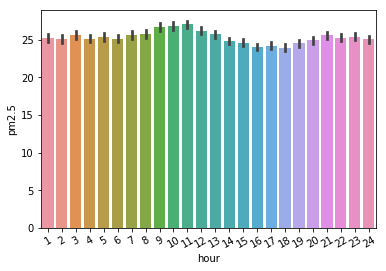

In [31]:
# 시간별 초미세먼지 평균
graph2 = sns.barplot(x="hour", y="pm2.5", data=all_train)
plt.xticks(rotation=30)

(array([   0,    1,    2, ..., 7293, 7294, 7295]),
 <a list of 7296 Text xticklabel objects>)

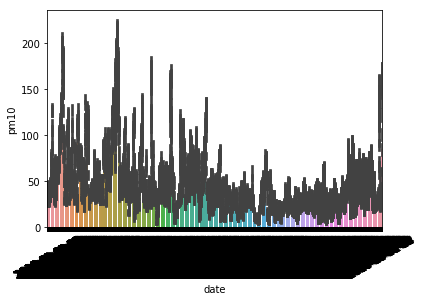

In [32]:
graph3 = sns.barplot(x="date", y="pm10", data=all_train)
plt.xticks(rotation=30)

In [ ]:
#train 데이터의 0.2만큼 test 데이터로 설정 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size = 0.2, random_state=2019)